In [100]:
import logging
from typing import List
import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from collections import Counter
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix, checkerboard_plot
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [101]:
df = pd.read_csv('../output/csv/preprocessed_data.csv')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    30000 non-null  object
 1   Author  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [102]:
def print_plot(index):
    example = df[df.index == index][['Text', 'Author']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Автор:', example[1])

In [103]:
def confusion_m(confusion):
    plot_confusion_matrix(conf_mat=confusion,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                                class_names=authors_names)

In [104]:
X = df['Text'].values.astype('U')
Y = df['Author']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True,random_state=25)

authors_names = list(Counter(Y).keys())


### Naive Bayes classifier for multinomial models

In [105]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(force_alpha=False)),
              ])
history = nb.fit(X_train, y_train)

In [106]:
%%time
y_pred = nb.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('accuracy %s' %score )
print(classification_report(y_test, y_pred))

accuracy 0.7435
                                precision    recall  f1-score   support

                 Іван-Багряний       0.74      0.71      0.73       578
          Володимир-Винниченко       0.81      0.76      0.79       591
             Володимир-Діброва       0.70      0.70      0.70       586
           Карпенко-Карий-Іван       0.83      0.89      0.86       638
                  Мирний-Панас       0.77      0.74      0.75       640
Нечуй-Левицький-Іван-Семенович       0.65      0.93      0.77       612
             Ольга-Кобилянська       0.66      0.84      0.74       568
                Тарас-Шевченко       0.86      0.34      0.49       585
              Хвильовий-Микола       0.84      0.68      0.75       596
                Юрій-Яновський       0.72      0.82      0.77       606

                      accuracy                           0.74      6000
                     macro avg       0.76      0.74      0.73      6000
                  weighted avg       0.76     

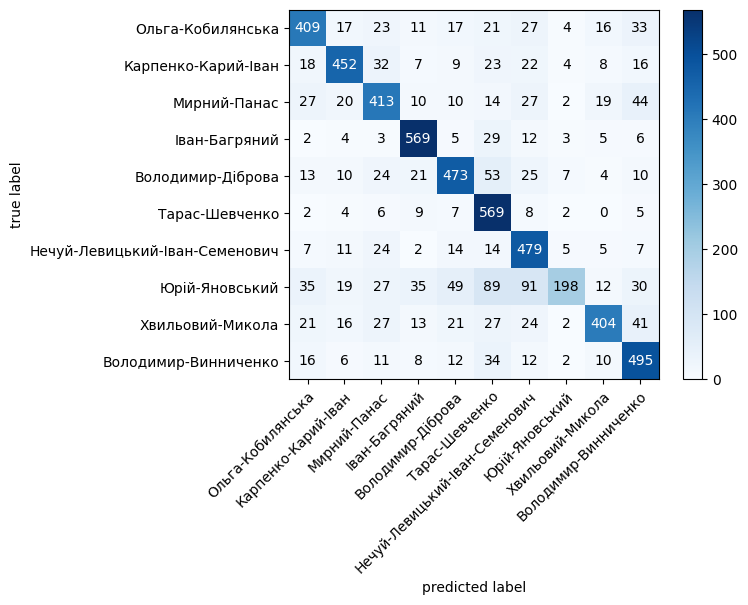

In [107]:
confusion = confusion_matrix(y_test, y_pred)
confusion_m(confusion)

In [108]:
nb.predict(['Марія Іванівна чути'])

array(['Карпенко-Карий-Іван'], dtype='<U30')

In [109]:
new_file = open('MultinomialNB.pckl','wb')
pickle.dump(nb,new_file)
new_file.close()

### Logistic regression

In [119]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

l:\authorship attribution\Authorship_attribution_for_Ua\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=100000.0, max_iter=1000, n_jobs=1))])

In [120]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7128333333333333
                                precision    recall  f1-score   support

                 Іван-Багряний       0.66      0.66      0.66       578
          Володимир-Винниченко       0.75      0.75      0.75       591
             Володимир-Діброва       0.60      0.69      0.64       586
           Карпенко-Карий-Іван       0.91      0.88      0.90       638
                  Мирний-Панас       0.67      0.67      0.67       640
Нечуй-Левицький-Іван-Семенович       0.79      0.80      0.79       612
             Ольга-Кобилянська       0.76      0.72      0.74       568
                Тарас-Шевченко       0.54      0.56      0.55       585
              Хвильовий-Микола       0.72      0.67      0.69       596
                Юрій-Яновський       0.76      0.71      0.74       606

                      accuracy                           0.71      6000
                     macro avg       0.71      0.71      0.71      6000
                  weighted avg    

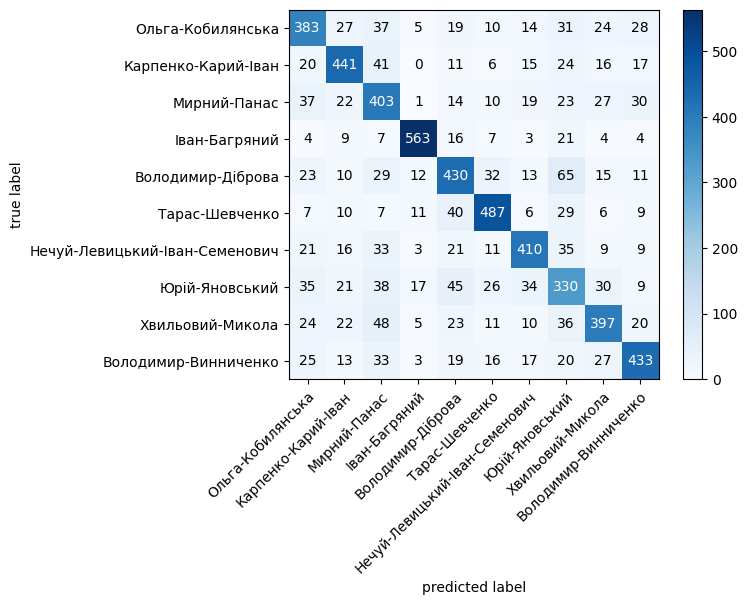

In [121]:
confusion = confusion_matrix(y_test, y_pred)
confusion_m(confusion)

In [122]:
new_file = open('LogisticRegression.pckl','wb')
pickle.dump(logreg,new_file)
new_file.close()

### SVC model

In [123]:
from sklearn.svm import SVC

In [124]:
svc = Pipeline([('vect', CountVectorizer()),
                #('tfidf', TfidfTransformer()),
                ('clf', SVC()),
               ])
svc.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', SVC())])

In [125]:
%%time

y_pred = svc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

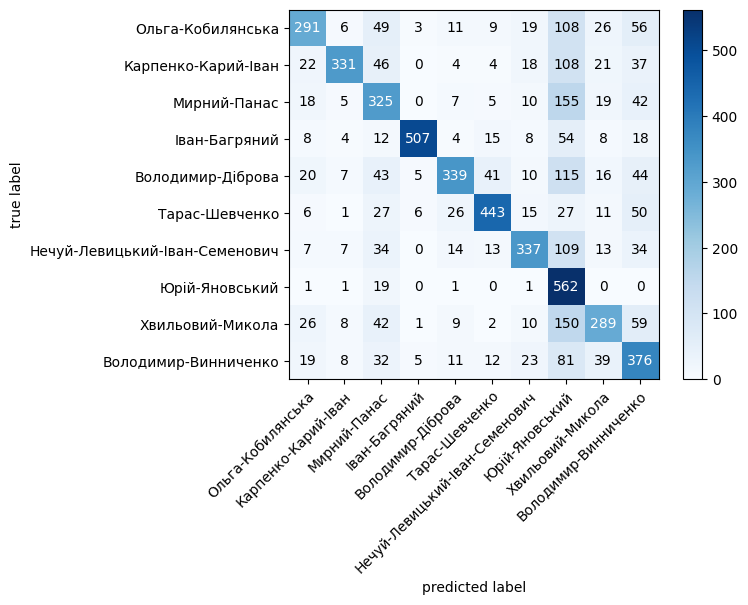

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
confusion_m(confusion)

In [ ]:
new_file = open('Svc.pckl','wb')
pickle.dump(svc,new_file)
new_file.close()